In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.cluster import KMeans
from sklearn import datasets
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
# 函数定义
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision_score(y_true, y_pred, average='binary'):
    unique_labels = np.unique(y_true)
    precision_scores = []

    for label in unique_labels:
        true_positives = np.sum((y_true == label) & (y_pred == label))
        false_positives = np.sum((y_true != label) & (y_pred == label))
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
        precision_scores.append(precision)

    if average == 'micro':
        return np.sum(precision_scores) / len(unique_labels)
    elif average == 'macro':
        return np.mean(precision_scores)
    elif average == 'weighted':
        class_counts = np.bincount(y_true)
        weighted_precision = np.sum(precision_scores * class_counts) / len(y_true)
        return weighted_precision
    elif average == 'binary':
        return precision_scores[1] if len(precision_scores) == 2 else 0
    else:
        raise ValueError("Invalid value for 'average'. Use 'micro', 'macro', 'weighted', or 'binary'.")

def recall_score(y_true, y_pred, average='binary'):
    unique_labels = np.unique(y_true)
    recall_scores = []

    for label in unique_labels:
        true_positives = np.sum((y_true == label) & (y_pred == label))
        false_negatives = np.sum((y_true == label) & (y_pred != label))
        
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
        recall_scores.append(recall)

    if average == 'micro':
        return np.sum(recall_scores) / len(unique_labels)
    elif average == 'macro':
        return np.mean(recall_scores)
    elif average == 'weighted':
        class_counts = np.bincount(y_true)
        weighted_recall = np.sum(recall_scores * class_counts) / len(y_true)
        return weighted_recall
    elif average == 'binary':
        return recall_scores[1] if len(recall_scores) == 2 else 0
    else:
        raise ValueError("Invalid value for 'average'. Use 'micro', 'macro', 'weighted', or 'binary'.")

# 加载数据集

In [4]:
'''
DESCR 键对应的值是数据集的简要说明。这里给出说明的开头部分。
target_names 键对应的值是一个字符串数组，里面包含我们要预测的花的品钟。
data 数组的每一行对应一朵花，列代表每朵花的四个测量数据
可以看出，数组中包含150 朵不同的花的测量数据。样本（sample）属性叫作特征（feature）。data 数组的形状（shape）是样本数乘以特征数。
'''
iris = datasets.load_iris()
 
X = iris.data
y = iris.target
print(X)       
print(y)        
print(X.shape)
print(y.shape)
print(iris.keys())
print(iris["DESCR"][:193])
print("Target names: {}".format(iris["target_names"]))
print("Feature names: {}".format(iris['feature_names']))
print("Type of data: {}".format(type(iris['data'])))
print("shape of data: {}".format(iris['data'].shape))
print("First five rows of data:\n{}".format(iris['data'][:5]))
print("Type of target:{}".format(type(iris['target'])))
print("Shape of target:{}".format(iris['target'].shape))
print("target:\n{}".format(iris['target']))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
# 存入csv
import pandas as pd
df=pd.DataFrame()
for i in range(X.shape[1]):
    df[iris.feature_names[i]]=X[:,i]
df['target']=y
df.to_csv('iris_dataset.csv',index=None)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [6]:
print(df.info())
# 导入数据集
data1 = r"C:\Users\win11\qgzouxt\CODE\iris_kmeans\iris_dataset.csv"

iris_local = pd.read_csv(data1, usecols=[0, 1, 2, 3, 4])
iris_local = iris_local.dropna()    # 丢弃含空值的行、列
iris_local.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
print(iris_local.columns)

iris_local.info()
X = iris_local[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]        

y = iris_local['target']     # 等价于iris_dataset.target
# 对标签集进行编码
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 训练数据与测试数据

In [8]:
# 手搓 train_test_split
def train_test_split(X, y, test_size=0.3, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)

    # 获取数据集的长度
    total_samples = len(X)

    # 计算测试集的大小
    test_samples = int(total_samples * test_size)

    # 生成随机索引
    indices = np.arange(total_samples)
    np.random.shuffle(indices)

    # 划分数据集
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # 调整y_train和y_test的顺序
    y_train = np.array([y[i] for i in train_indices])
    y_test = np.array([y[i] for i in test_indices])

    X_train = np.array([X[i] for i in train_indices])
    X_test = np.array([X[i] for i in test_indices])

    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],test_size=0.3, random_state=0)
print('y_train = ', y_train)
print('y_test = ', y_test)

X = iris.data[:, :4] # #表示我们取特征空间中的4个维度
print(X.shape)

y_train =  [1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
y_test =  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
(150, 4)


# 探索数据

'\n径向可视化是多维数据降维的可视化方法，不管是数据分析还是机器学习，降维是最基础的方法之一，通过降维，可以有效的减少复杂度。径向坐标可视化是基于弹簧张力最小化算法。它把数据集的特征映射成二维目标空间单位圆中的一个点，点的位置由系在点上的特征决定。把实例投入圆的中心，特征会朝圆中此实例位置（实例对应的归一化数值）“拉”实例。\n'

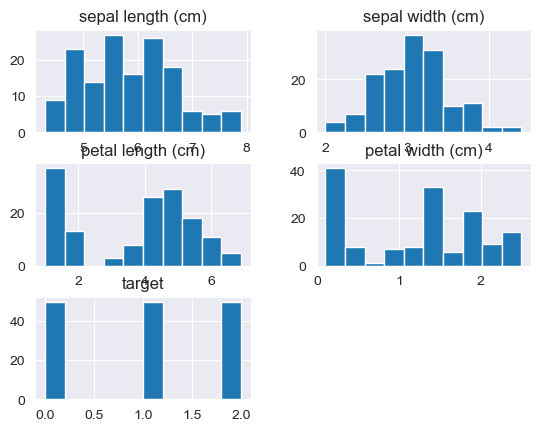

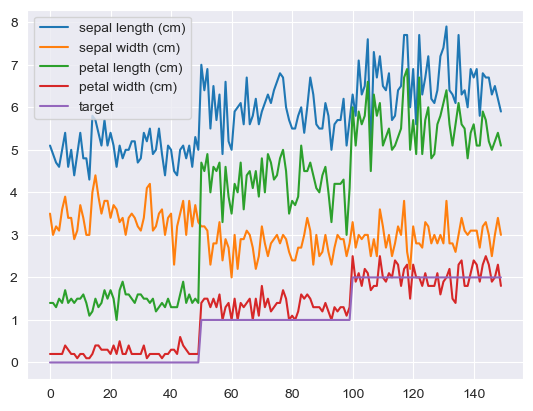

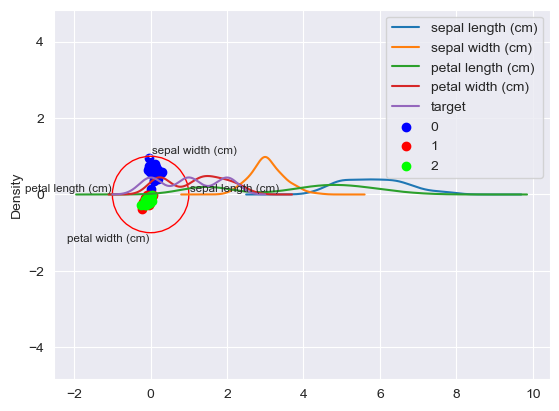

In [9]:
'''
检查数据也是发现异常值和特殊值的好方法。检查数据的最佳方法之一就是将其可视化。先查看数据集各特征列的摘要统计信息
直方图，反馈的是数据的频度，一般常见的是高斯分布（正态分布）。
plot直接展示数据的分布情况，kde核密度估计对比直方图来看
'''
iris_local.describe()
iris_local.hist()
iris_local.plot()
iris_local.plot(kind='kde')
ax = pd.plotting.radviz(iris_local, 'target', colormap='brg')
ax.add_artist(plt.Circle((0,0), 1, color='r', fill = False))
'''
径向可视化是多维数据降维的可视化方法，不管是数据分析还是机器学习，降维是最基础的方法之一，通过降维，可以有效的减少复杂度。径向坐标可视化是基于弹簧张力最小化算法。它把数据集的特征映射成二维目标空间单位圆中的一个点，点的位置由系在点上的特征决定。把实例投入圆的中心，特征会朝圆中此实例位置（实例对应的归一化数值）“拉”实例。
'''

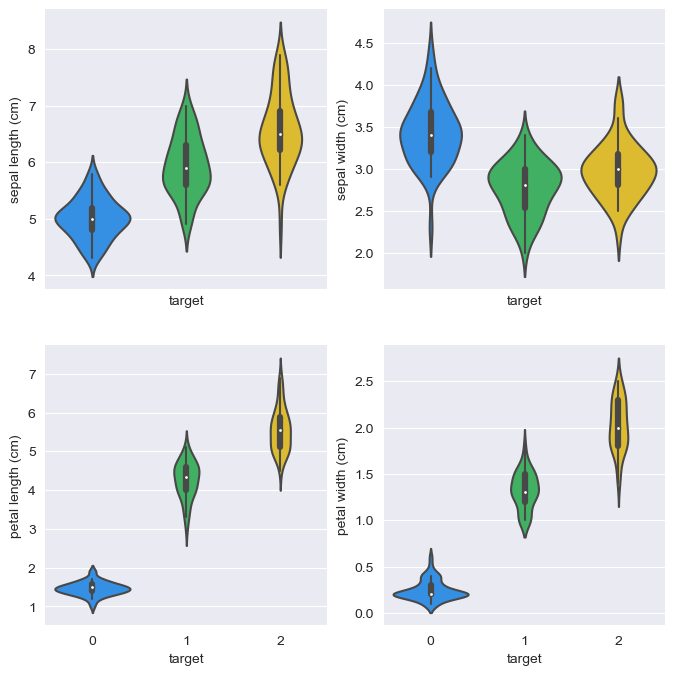

In [10]:
import seaborn as sns
# 通过Violinplot 和 Pointplot，分别从数据分布和斜率，观察各特征与品种之间的关系
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 

# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='target', y='sepal length (cm)', data=iris_local, palette=antV, ax=axes[(0, 0)])
sns.violinplot(x='target', y='sepal width (cm)', data=iris_local, palette=antV, ax=axes[(0, 1)])
sns.violinplot(x='target', y='petal length (cm)', data=iris_local, palette=antV, ax=axes[(1, 0)])
sns.violinplot(x='target', y='petal width (cm)', data=iris_local, palette=antV, ax=axes[(1, 1)])

plt.show()


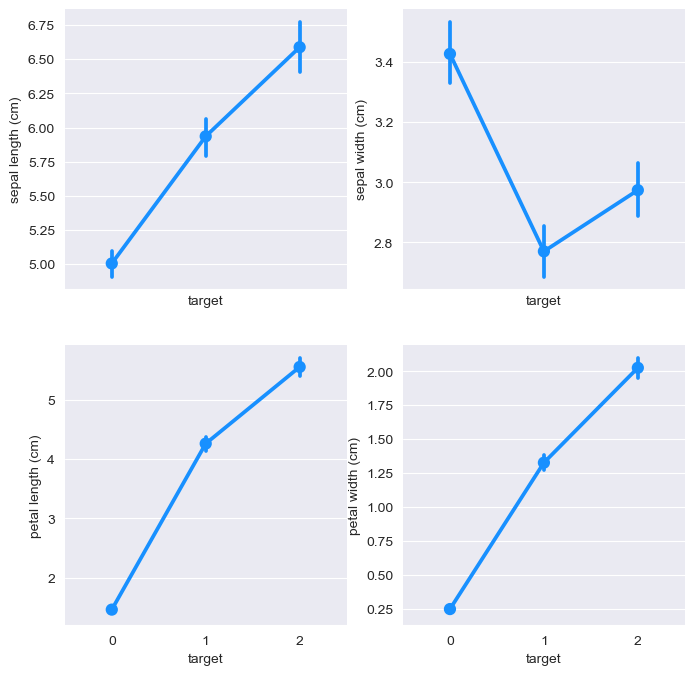

In [11]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.pointplot(x='target', y='sepal length (cm)', data=iris_local, color=antV[0], ax=axes[0, 0])
sns.pointplot(x='target', y='sepal width (cm)', data=iris_local, color=antV[0], ax=axes[0, 1])
sns.pointplot(x='target', y='petal length (cm)', data=iris_local, color=antV[0], ax=axes[1, 0])
sns.pointplot(x='target', y='petal width (cm)', data=iris_local, color=antV[0], ax=axes[1, 1])

plt.show()


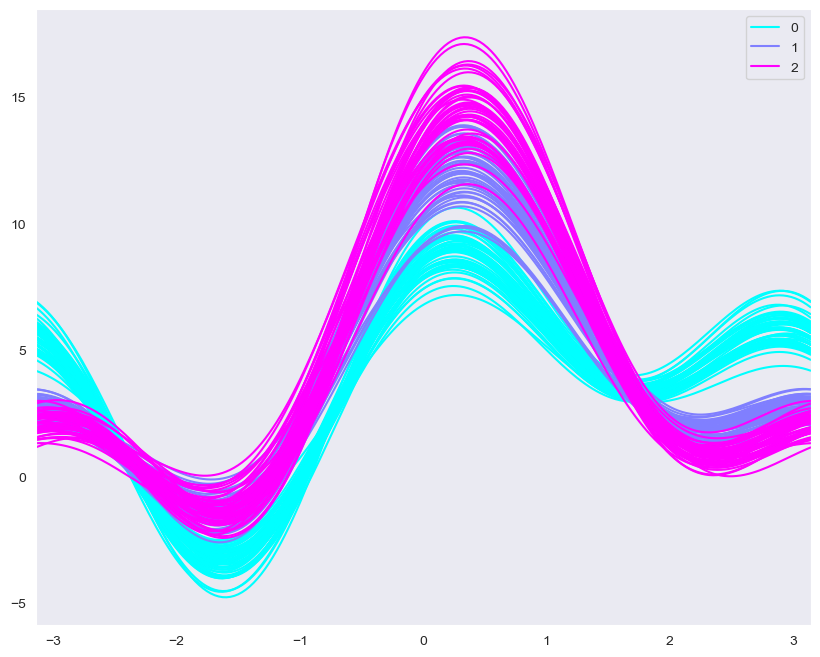

<Axes: >

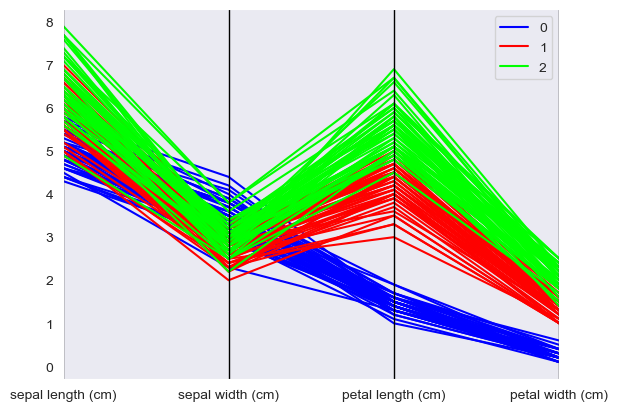

In [12]:
'''
Andrews曲线将每个样本的属性值转化为傅里叶序列的系数来创建曲线，这对于检测时间序列数据中的异常值很有用。通过将每一类曲线标成不同颜色可以可视化聚类数据，属于相同类别的样本的曲线通常更加接近并构成了更大的结构
'''
# 使用 Andrews Curves 将每个多变量观测值转换为曲线并表示傅立叶级数的系数，这对于检测时间序列数据中的异常值很有用。
plt.subplots(figsize = (10,8))
pd.plotting.andrews_curves(iris_local, 'target', colormap='cool')
plt.show()
'''
平行坐标可以看到数据中的类别以及从视觉上估计其他的统计量。使用平行坐标时，每个点用线段联接，每个垂直的线代表一个属性， 一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。
'''
pd.plotting.parallel_coordinates(iris_local, 'target', colormap = 'brg')



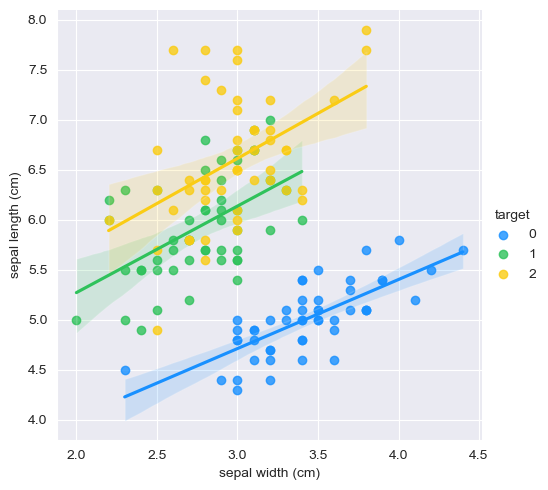

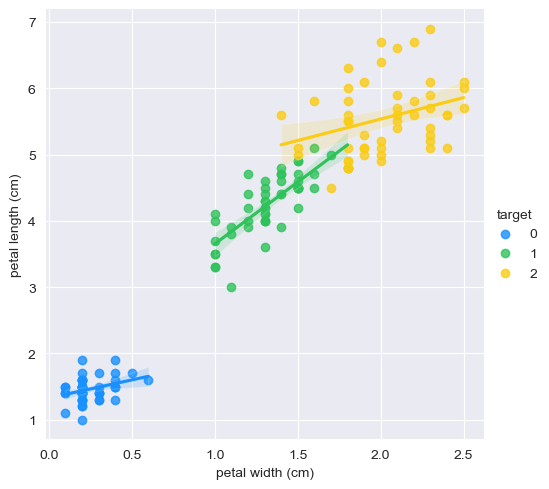

In [13]:
#下面分别基于花萼和花瓣做线性回归的可视化：

g = sns.lmplot(data=iris_local, x='sepal width (cm)', y='sepal length (cm)', palette=antV, hue='target')
g = sns.lmplot(data=iris_local, x='petal width (cm)', y='petal length (cm)', palette=antV, hue='target')




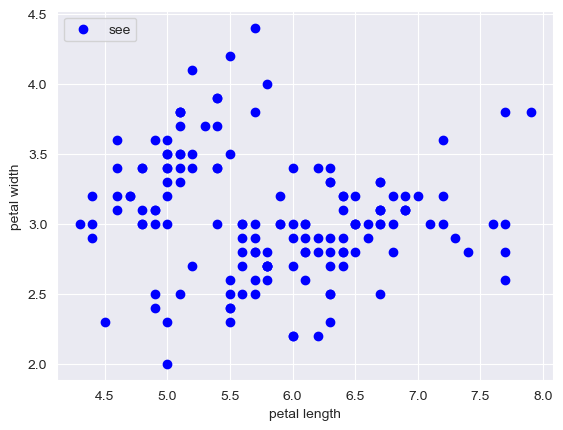

In [14]:
# 绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [15]:
#import os
#os.environ["OMP_NUM_THREADS"] = '1'

# 构建模型

In [16]:
#import warnings
# 忽略特定类型的警告
#warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
# 手搓 KMeans
'''
K-means算法是典型的基于距离（欧式距离、曼哈顿距离）的聚类算法，采用距离作为相似性的评价指标，即认为两个对象的距离越近，其相似度就越大。
'''
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        
        # 随机选择初始聚类中心
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # 计算每个样本到聚类中心的距离
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            
            # 分配样本到最近的聚类中心
            self.labels_ = np.argmin(distances, axis=1)
            
            # 更新聚类中心
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # 如果聚类中心没有改变，提前结束迭代
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
        
        
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)


In [17]:
# 绘制k-means结果,K=3
estimator = KMeans(n_clusters=3) # 构造聚类器
estimator.fit(X) # 聚类
 
y_pred = estimator.predict(X_test)   
 
label_pred = estimator.labels_ # 获取聚类标签


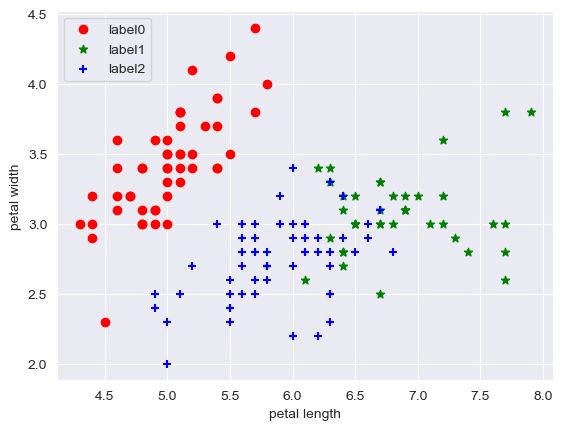

In [18]:

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [19]:
print('准确率:', accuracy_score(y_test, y_pred))
print('精确率:', precision_score(y_test, y_pred, average='weighted'))
print('召回率:', recall_score(y_test, y_pred, average='weighted'))

准确率: 0.4444444444444444
精确率: 0.4
召回率: 0.4444444444444444


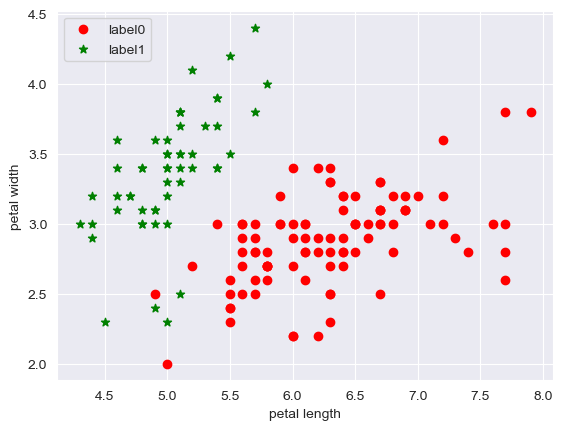

In [20]:
### 当 K=2的时候
estimator = KMeans(n_clusters=2)       #构造聚类器
estimator.fit(X)                       #聚类
y_pred = estimator.predict(X_test)   

label_pred = estimator.labels_         #获取聚类标签
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [21]:
print('准确率:', accuracy_score(y_test, y_pred))
print('精确率:', precision_score(y_test, y_pred, average='weighted'))
print('召回率:', recall_score(y_test, y_pred, average='weighted'))

准确率: 0.022222222222222223
精确率: 0.023529411764705882
召回率: 0.022222222222222223


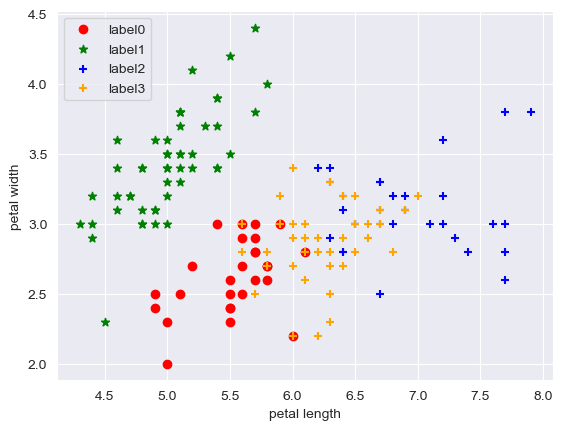

In [22]:
# 当K=4的时候
estimator = KMeans(n_clusters=4)       #构造聚类器
estimator.fit(X)                       #聚类

y_pred = estimator.predict(X_test)     
label_pred = estimator.labels_         #获取聚类标签
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(x3[:, 0], x3[:, 1], c = "orange", marker='+', label='label3')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

In [23]:
print('准确率:', accuracy_score(y_test, y_pred))
print('精确率:', precision_score(y_test, y_pred, average='weighted'))
print('召回率:', recall_score(y_test, y_pred, average='weighted'))

准确率: 0.13333333333333333
精确率: 0.24444444444444444
召回率: 0.13333333333333333


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

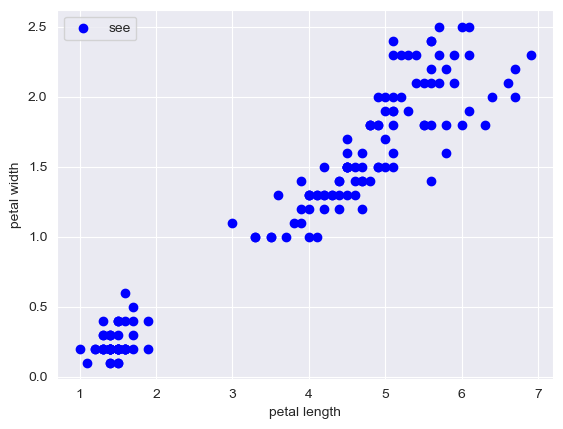

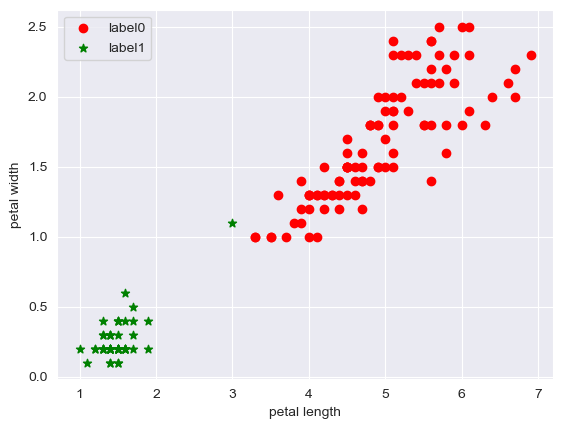

In [24]:
X = iris.data[:,2:]            #表示我们只取特征空间中的后两个维度
print (X)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c = "blue", marker='o', label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()                       #绘制数据分布图
# 当 K=2的时候
estimator = KMeans(n_clusters=2)       #构造聚类器
estimator.fit(X)                       #聚类
label_pred = estimator.labels_         #获取聚类标签
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

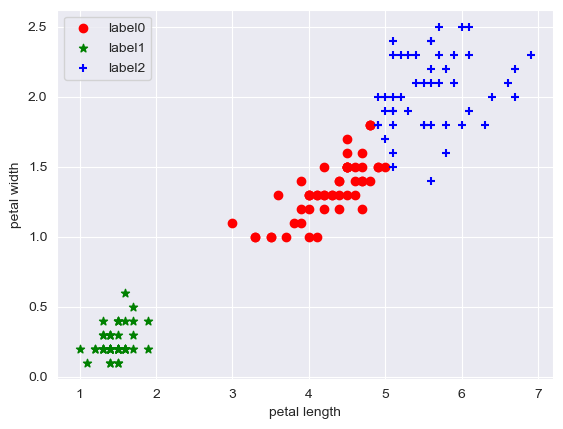

In [25]:
# 当 K=3的时候
estimator = KMeans(n_clusters=3)       #构造聚类器
estimator.fit(X)                       #聚类
label_pred = estimator.labels_         #获取聚类标签
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()


[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

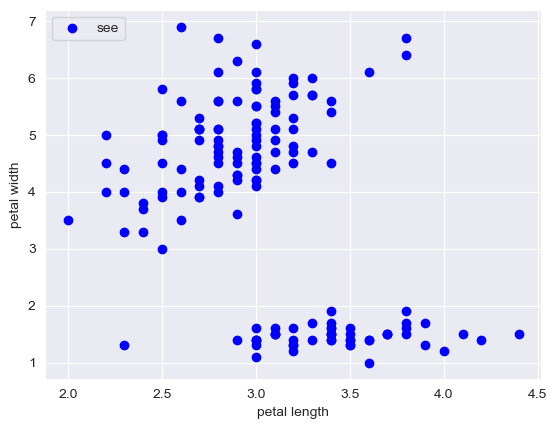

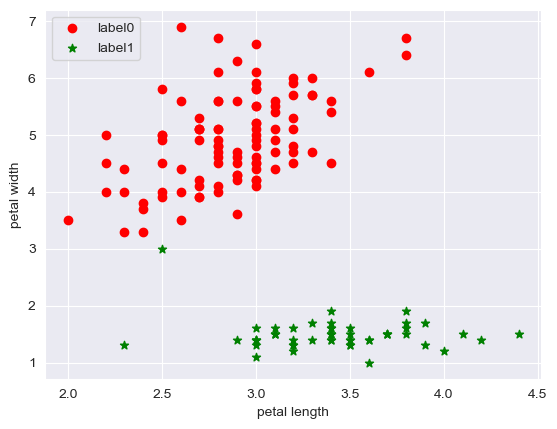

In [26]:
X = iris.data[:,1:]       #表示我们只取特征空间中的后三个维度
print (X)
print(X.shape)
plt.scatter(X[:,0],X[:,1], c="blue",marker='o',label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()
#当 K=2的时候
estimator = KMeans(n_clusters=2)       #构造聚类器
estimator.fit(X)                       #聚类

label_pred = estimator.labels_         #获取聚类标签
#绘制 k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()


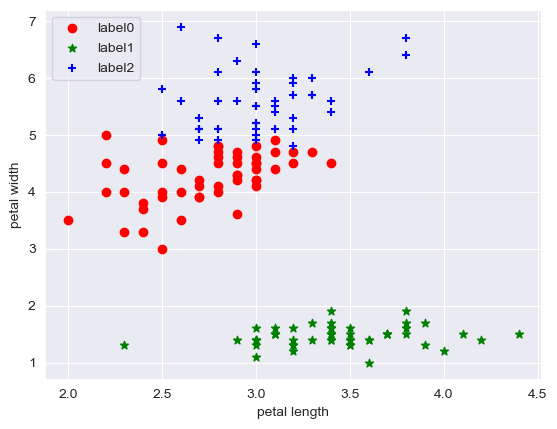

In [27]:
#当 K=3的时候
estimator = KMeans(n_clusters=3)       #构造聚类器
estimator.fit(X)                       #聚类

label_pred = estimator.labels_         #获取聚类标签
#绘制 k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()


# 模型评估

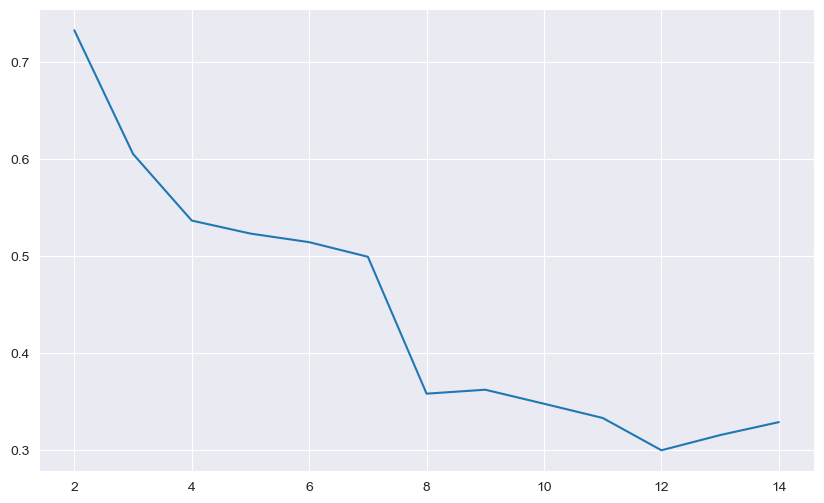

In [28]:
#  使用轮廓系数法评价K-Means聚类模型 --- 畸变程度
#import os
#os.environ["OMP_NUM_THREADS"] = '1'
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        
        # 随机选择初始聚类中心
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # 计算每个样本到聚类中心的距离
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            
            # 分配样本到最近的聚类中心
            self.labels_ = np.argmin(distances, axis=1)
            
            # 更新聚类中心
            new_centroids = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # 如果聚类中心没有改变，提前结束迭代
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
        
        return self  # 返回 KMeans 类的实例

def silhouette_score(X, labels):
    n = len(X)
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        a[i] = np.mean(np.linalg.norm(X[labels == labels[i]] - X[i], axis=1))
        
        b_values = []
        for j in range(len(np.unique(labels))):
            if j != labels[i]:
                b_values.append(np.mean(np.linalg.norm(X[labels == j] - X[i], axis=1)))
        
        b[i] = min(b_values)
    
    silhouette_scores = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_scores)

silhouetteScore = []
for i in range(2,15):
    # 构建并训练模型
    kmeans = KMeans(n_clusters=i,random_state=123).fit(X)
    score = silhouette_score(X,kmeans.labels_) #kmeans.labels_
    silhouetteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouetteScore,linewidth=1.5,linestyle='-')
plt.show()

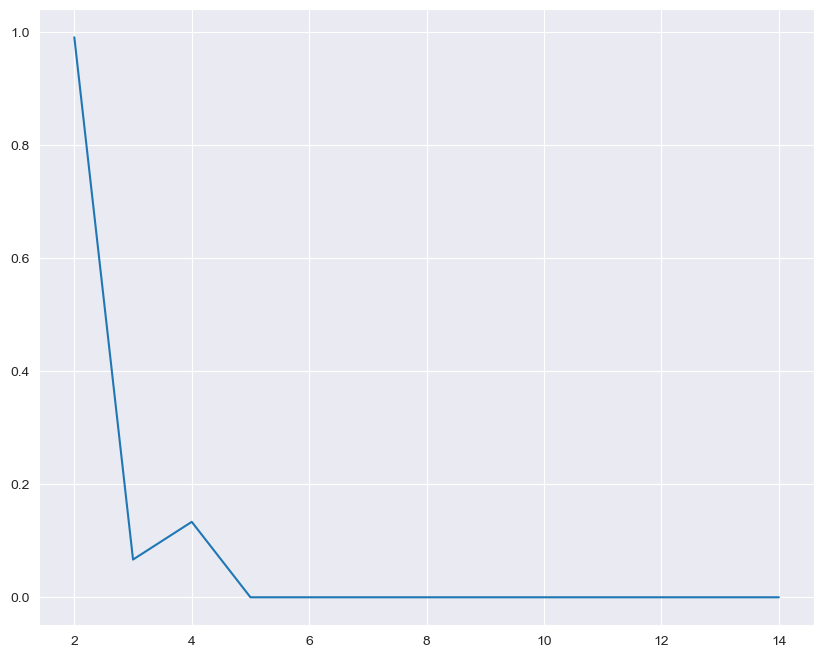

In [29]:
# FMI评价法 --- 需要有真实标签
#from sklearn.metrics import fowlkes_mallows_score
def fowlkes_mallows_score(y_true, y_pred):
    n_samples = len(y_true)
    
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    
    if precision + recall == 0:
        fms_score = 0
    else:
        fms_score = 2 * (precision * recall) / (precision + recall)
    
    return fms_score


fms = []
for i in range(2,15):
    # 构建聚类模型
    kmeans = KMeans(n_clusters=i,random_state=112).fit(X)
    fmsScore = fowlkes_mallows_score(y,kmeans.labels_)
    fms.append(fmsScore)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), fms, linewidth=1.5, linestyle='-')
plt.show()